Раунд 1
Произошла авария на дороге E. Время увеличено в 2.15 раза.
Раунд 2
Раунд 3
Раунд 4
Произошла авария на дороге B. Время увеличено в 1.61 раза.
Раунд 5
Раунд 6
Раунд 7
Раунд 8
Раунд 9
Раунд 10
Раунд 11
Раунд 12
Раунд 13
Раунд 14
Раунд 15
Раунд 16
Раунд 17
Раунд 18
Раунд 19
Раунд 20
Раунд 21
Раунд 22
Раунд 23
Раунд 24
Раунд 25
Произошла авария на дороге E. Время увеличено в 2.69 раза.
Раунд 26
Раунд 27
Раунд 28
Раунд 29
Раунд 30
Произошла авария на дороге A. Время увеличено в 2.25 раза.
Раунд 31
Раунд 32
Произошла авария на дороге B. Время увеличено в 1.59 раза.
Раунд 33
Раунд 34
Раунд 35
Произошла авария на дороге A. Время увеличено в 1.75 раза.
Раунд 36
Раунд 37
Раунд 38
Раунд 39
Раунд 40
Раунд 41
Раунд 42
Раунд 43
Раунд 44
Раунд 45
Раунд 46
Раунд 47
Произошла авария на дороге E. Время увеличено в 1.77 раза.
Раунд 48
Произошла авария на дороге C. Время увеличено в 1.66 раза.
Раунд 49
Раунд 50


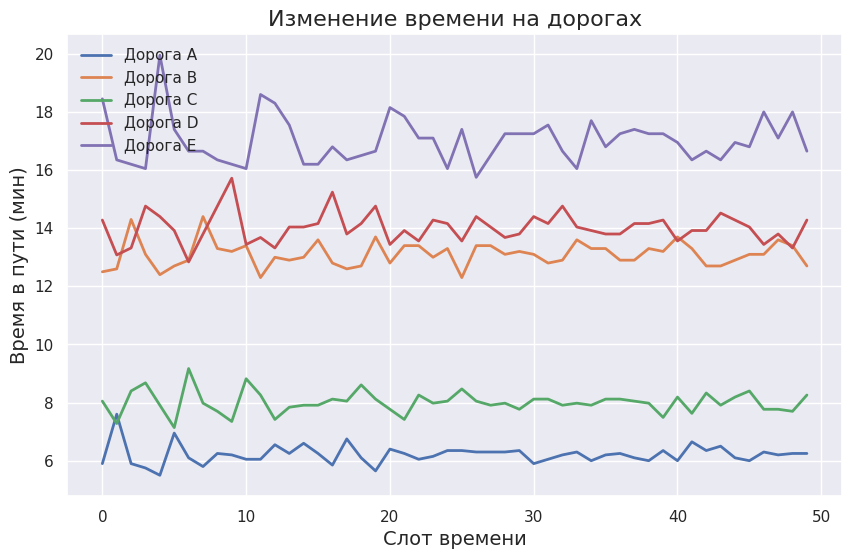

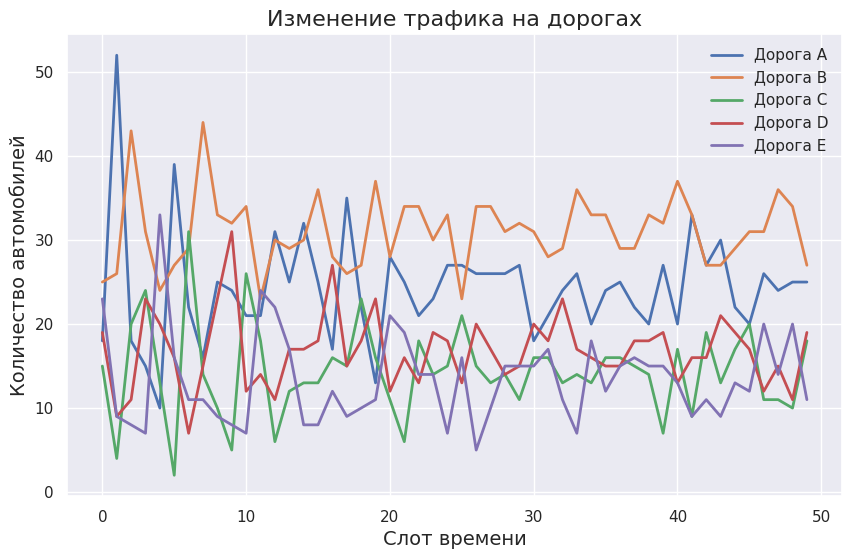

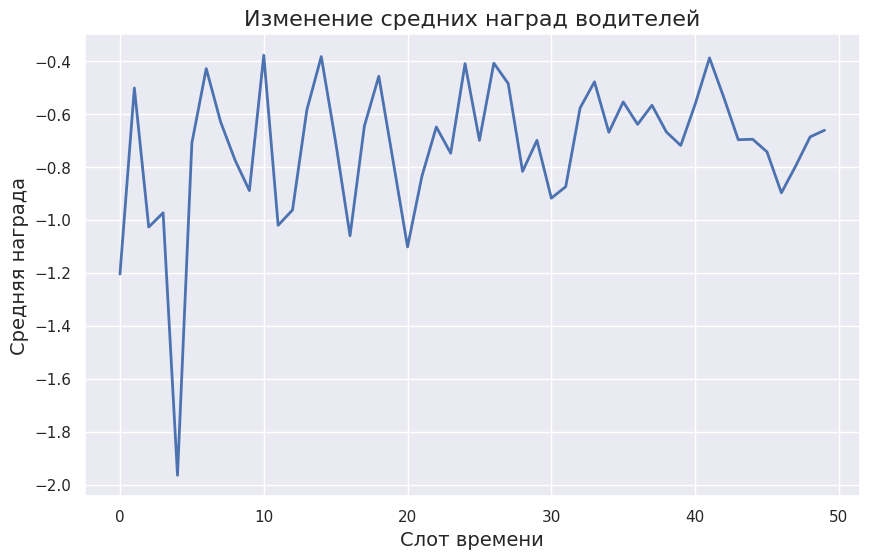

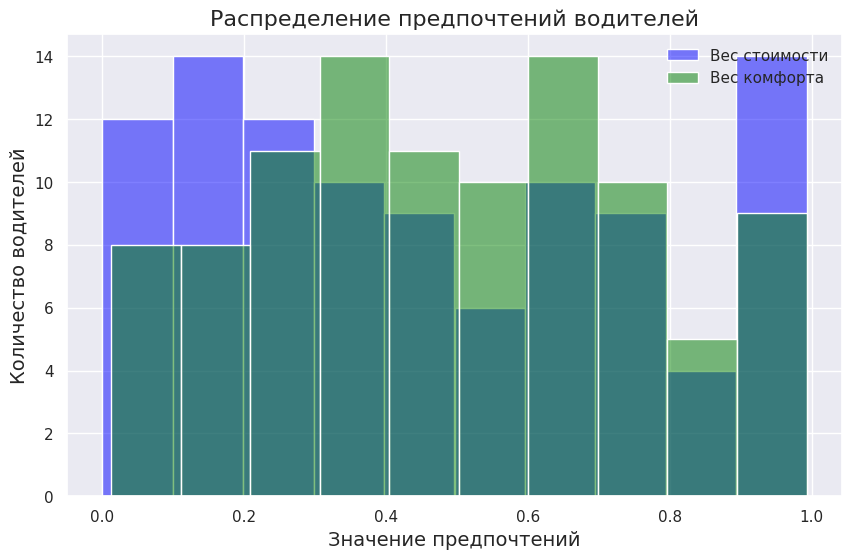

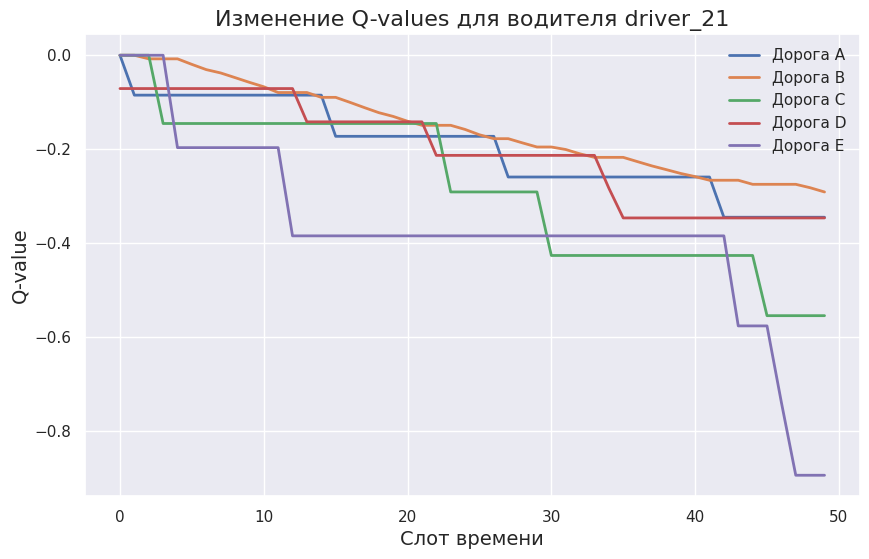

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля Seaborn
sns.set(style="darkgrid")  # Настраиваем стиль через Seaborn

# Параметры модели
num_drivers = 100
num_rounds = 50

# Описание дорог
roads = {
    'A': {'base_time': 5, 'traffic_factor': 0.05, 'quality': 0.9, 'cost': 2, 'comfort': 0.8},
    'B': {'base_time': 10, 'traffic_factor': 0.1, 'quality': 0.7, 'cost': 1, 'comfort': 0.6},
    'C': {'base_time': 7, 'traffic_factor': 0.07, 'quality': 0.8, 'cost': 3, 'comfort': 0.9},
    'D': {'base_time': 12, 'traffic_factor': 0.12, 'quality': 0.6, 'cost': 2, 'comfort': 0.7},
    'E': {'base_time': 15, 'traffic_factor': 0.15, 'quality': 0.5, 'cost': 4, 'comfort': 0.5},
}

# Инициализация данных для хранения результатов
road_traffic_history = {road: [] for road in roads}
road_time_history = {road: [] for road in roads}
rewards_history = []
q_values_history = []

# Функция для пересчета времени на дороге с учетом трафика
def calculate_time_on_road(road, traffic):
    road_info = roads[road]
    time = road_info['base_time'] + road_info['traffic_factor'] * traffic
    return time

# Функция для перераспределения трафика по дорогам
def redistribute_traffic(drivers, preferences, q_values, epsilon):
    new_traffic = {road: 0 for road in roads}
    for driver in drivers:
        # Выбор маршрута на основе Q-values (epsilon-greedy)
        if np.random.rand() < epsilon:
            road_choice = random.choice(list(roads.keys()))  # случайный выбор (исследование)
        else:
            road_choice = max(q_values[driver], key=q_values[driver].get)  # выбор по максимальной награде (эксплуатация)

        new_traffic[road_choice] += 1  # добавляем трафик на выбранную дорогу
        drivers[driver] = road_choice
    return new_traffic

# Инициализация водителей и их предпочтений
drivers = {f'driver_{i}': random.choice(list(roads.keys())) for i in range(num_drivers)}
driver_preferences = {driver: {'cost_weight': random.random(), 'comfort_weight': random.random()} for driver in drivers}

# Q-values для каждого водителя
q_values = {driver: {road: 0 for road in roads} for driver in drivers}

# Параметры Q-learning
alpha = 0.1  # скорость обучения
gamma = 0.9  # дисконтирование будущих наград
epsilon = 0.2  # вероятность выбора случайного действия

# Функция для моделирования аварий
def simulate_accidents(traffic):
    # Пример: случайная авария на одной из дорог
    accident_road = random.choice(list(roads.keys()))
    accident_impact = random.uniform(1.5, 3.0)  # увеличение времени в пути из-за аварии
    for road in traffic:
        if road == accident_road:
            traffic[road] *= accident_impact
            print(f"Произошла авария на дороге {road}. Время увеличено в {accident_impact:.2f} раза.")
    return traffic

# Начало симуляции
for round_num in range(num_rounds):
    print(f"Раунд {round_num + 1}")

    # Шаг 1: Рассчитать трафик на каждой дороге
    traffic = {road: 0 for road in roads}
    for driver, road in drivers.items():
        traffic[road] += 1

    # Сохраняем историю трафика для визуализации
    for road in traffic:
        road_traffic_history[road].append(traffic[road])
        road_time_history[road].append(calculate_time_on_road(road, traffic[road]))

    # Моделирование аварий
    if random.random() < 0.1:  # вероятность 10% на каждом раунде
        traffic = simulate_accidents(traffic)

    # Шаг 2: Пересчитать время в пути для каждой дороги с учетом трафика
    times = {road: calculate_time_on_road(road, traffic[road]) for road in roads}


    # Шаг 3: Водители получают награды на основе своих предпочтений и времени
    rewards = {}
    for driver, road in drivers.items():
        cost_weight = driver_preferences[driver]['cost_weight']
        comfort_weight = driver_preferences[driver]['comfort_weight']
        road_info = roads[road]

        # Рассчитываем награду для каждого водителя с учетом его предпочтений
        reward = -times[road] * (1 - cost_weight - comfort_weight) - road_info['cost'] * cost_weight + road_info['comfort'] * comfort_weight
        rewards[driver] = reward
        rewards_history.append(reward)

        # Обновляем Q-values с помощью правила Q-learning
        best_future_reward = max(q_values[driver].values())  # максимальная будущая награда
        q_values[driver][road] += alpha * (reward + gamma * best_future_reward - q_values[driver][road])

    # Сохраняем историю Q-values для визуализации
    q_values_history.append({driver: q_values[driver].copy() for driver in drivers})

    # Шаг 4: Перераспределение водителей по дорогам
    traffic = redistribute_traffic(drivers, driver_preferences, q_values, epsilon)

# Настройка стиля Seaborn
sns.set(style="darkgrid")  # Настраиваем стиль через Seaborn

# 1. График изменения времени на дорогах
plt.figure(figsize=(10, 6))
for road in roads:
    plt.plot(road_time_history[road], label=f'Дорога {road}', linewidth=2.0)
plt.title('Изменение времени на дорогах', fontsize=16)
plt.xlabel('Слот времени', fontsize=14)
plt.ylabel('Время в пути (мин)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 2. График изменения трафика на дорогах
plt.figure(figsize=(10, 6))
for road in roads:
    plt.plot(road_traffic_history[road], label=f'Дорога {road}', linewidth=2.0)
plt.title('Изменение трафика на дорогах', fontsize=16)
plt.xlabel('Слот времени', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 3. График наград (усредненный)
plt.figure(figsize=(10, 6))
plt.plot([np.mean(rewards_history[i:i + num_drivers]) for i in range(0, len(rewards_history), num_drivers)], linewidth=2.0)
plt.title('Изменение средних наград водителей', fontsize=16)
plt.xlabel('Слот времени', fontsize=14)
plt.ylabel('Средняя награда', fontsize=14)
plt.grid(True)
plt.show()

# 4. Гистограмма предпочтений водителей
cost_weights = [driver_preferences[driver]['cost_weight'] for driver in drivers]
comfort_weights = [driver_preferences[driver]['comfort_weight'] for driver in drivers]

plt.figure(figsize=(10, 6))
sns.histplot(cost_weights, bins=10, color='blue', alpha=0.5, label='Вес стоимости')
sns.histplot(comfort_weights, bins=10, color='green', alpha=0.5, label='Вес комфорта')
plt.title('Распределение предпочтений водителей', fontsize=16)
plt.xlabel('Значение предпочтений', fontsize=14)
plt.ylabel('Количество водителей', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 5. График изменений Q-values для одного водителя
driver_id = random.choice(list(drivers.keys()))  # случайный водитель
q_value_history_driver = {road: [] for road in roads}

# Сохраняем историю Q-values выбранного водителя
for round_q in q_values_history:
    for road in roads:
        q_value_history_driver[road].append(round_q[driver_id][road])

plt.figure(figsize=(10, 6))
for road in roads:
    plt.plot(q_value_history_driver[road], label=f'Дорога {road}', linewidth=2.0)
plt.title(f'Изменение Q-values для водителя {driver_id}', fontsize=16)
plt.xlabel('Слот времени', fontsize=14)
plt.ylabel('Q-value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
